# World Happiness Report Project


 - Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

- What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

- What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

- What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.

- Dataset Link-

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

https://github.com/dsrscientist/DSData

    
    

In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')
import pickle
import joblib

import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [4]:
#loading dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


in the above data set we can see that Happiness score is target label  and other columns is the features that will be contributing towards the label prediction. because our label is a continews data this is giong to be Regression problem. 

In [5]:
# checking all columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.shape 

(158, 12)

we can see there are 158 rows and 12 columns

In [7]:
# cnhecking null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

we notice there is no null values in the given dataset

In [8]:
# getting all info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
# describe the data
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


we can see the numerical data as above

In [10]:
# Dropping the categorical columns that are not useful for prediction
df=df.drop(['Country','Region','Happiness Rank'],axis = 1)

# Data Visualization 

<AxesSubplot:>

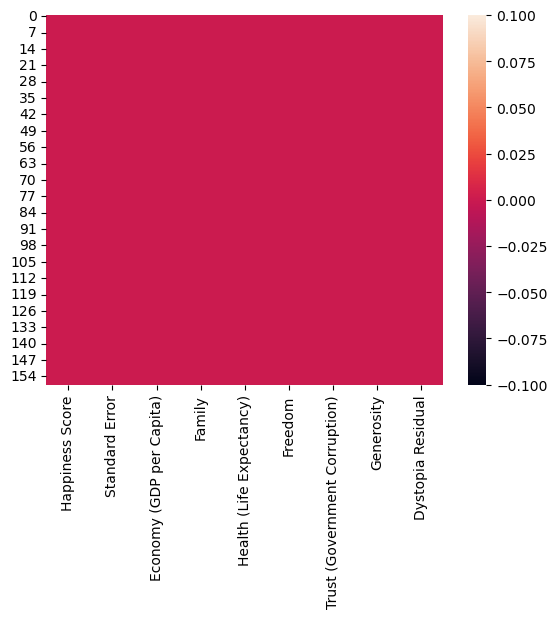

In [11]:
sns.heatmap(df.isnull())

by the given plot we can see the correlation between Happiness score  with other features

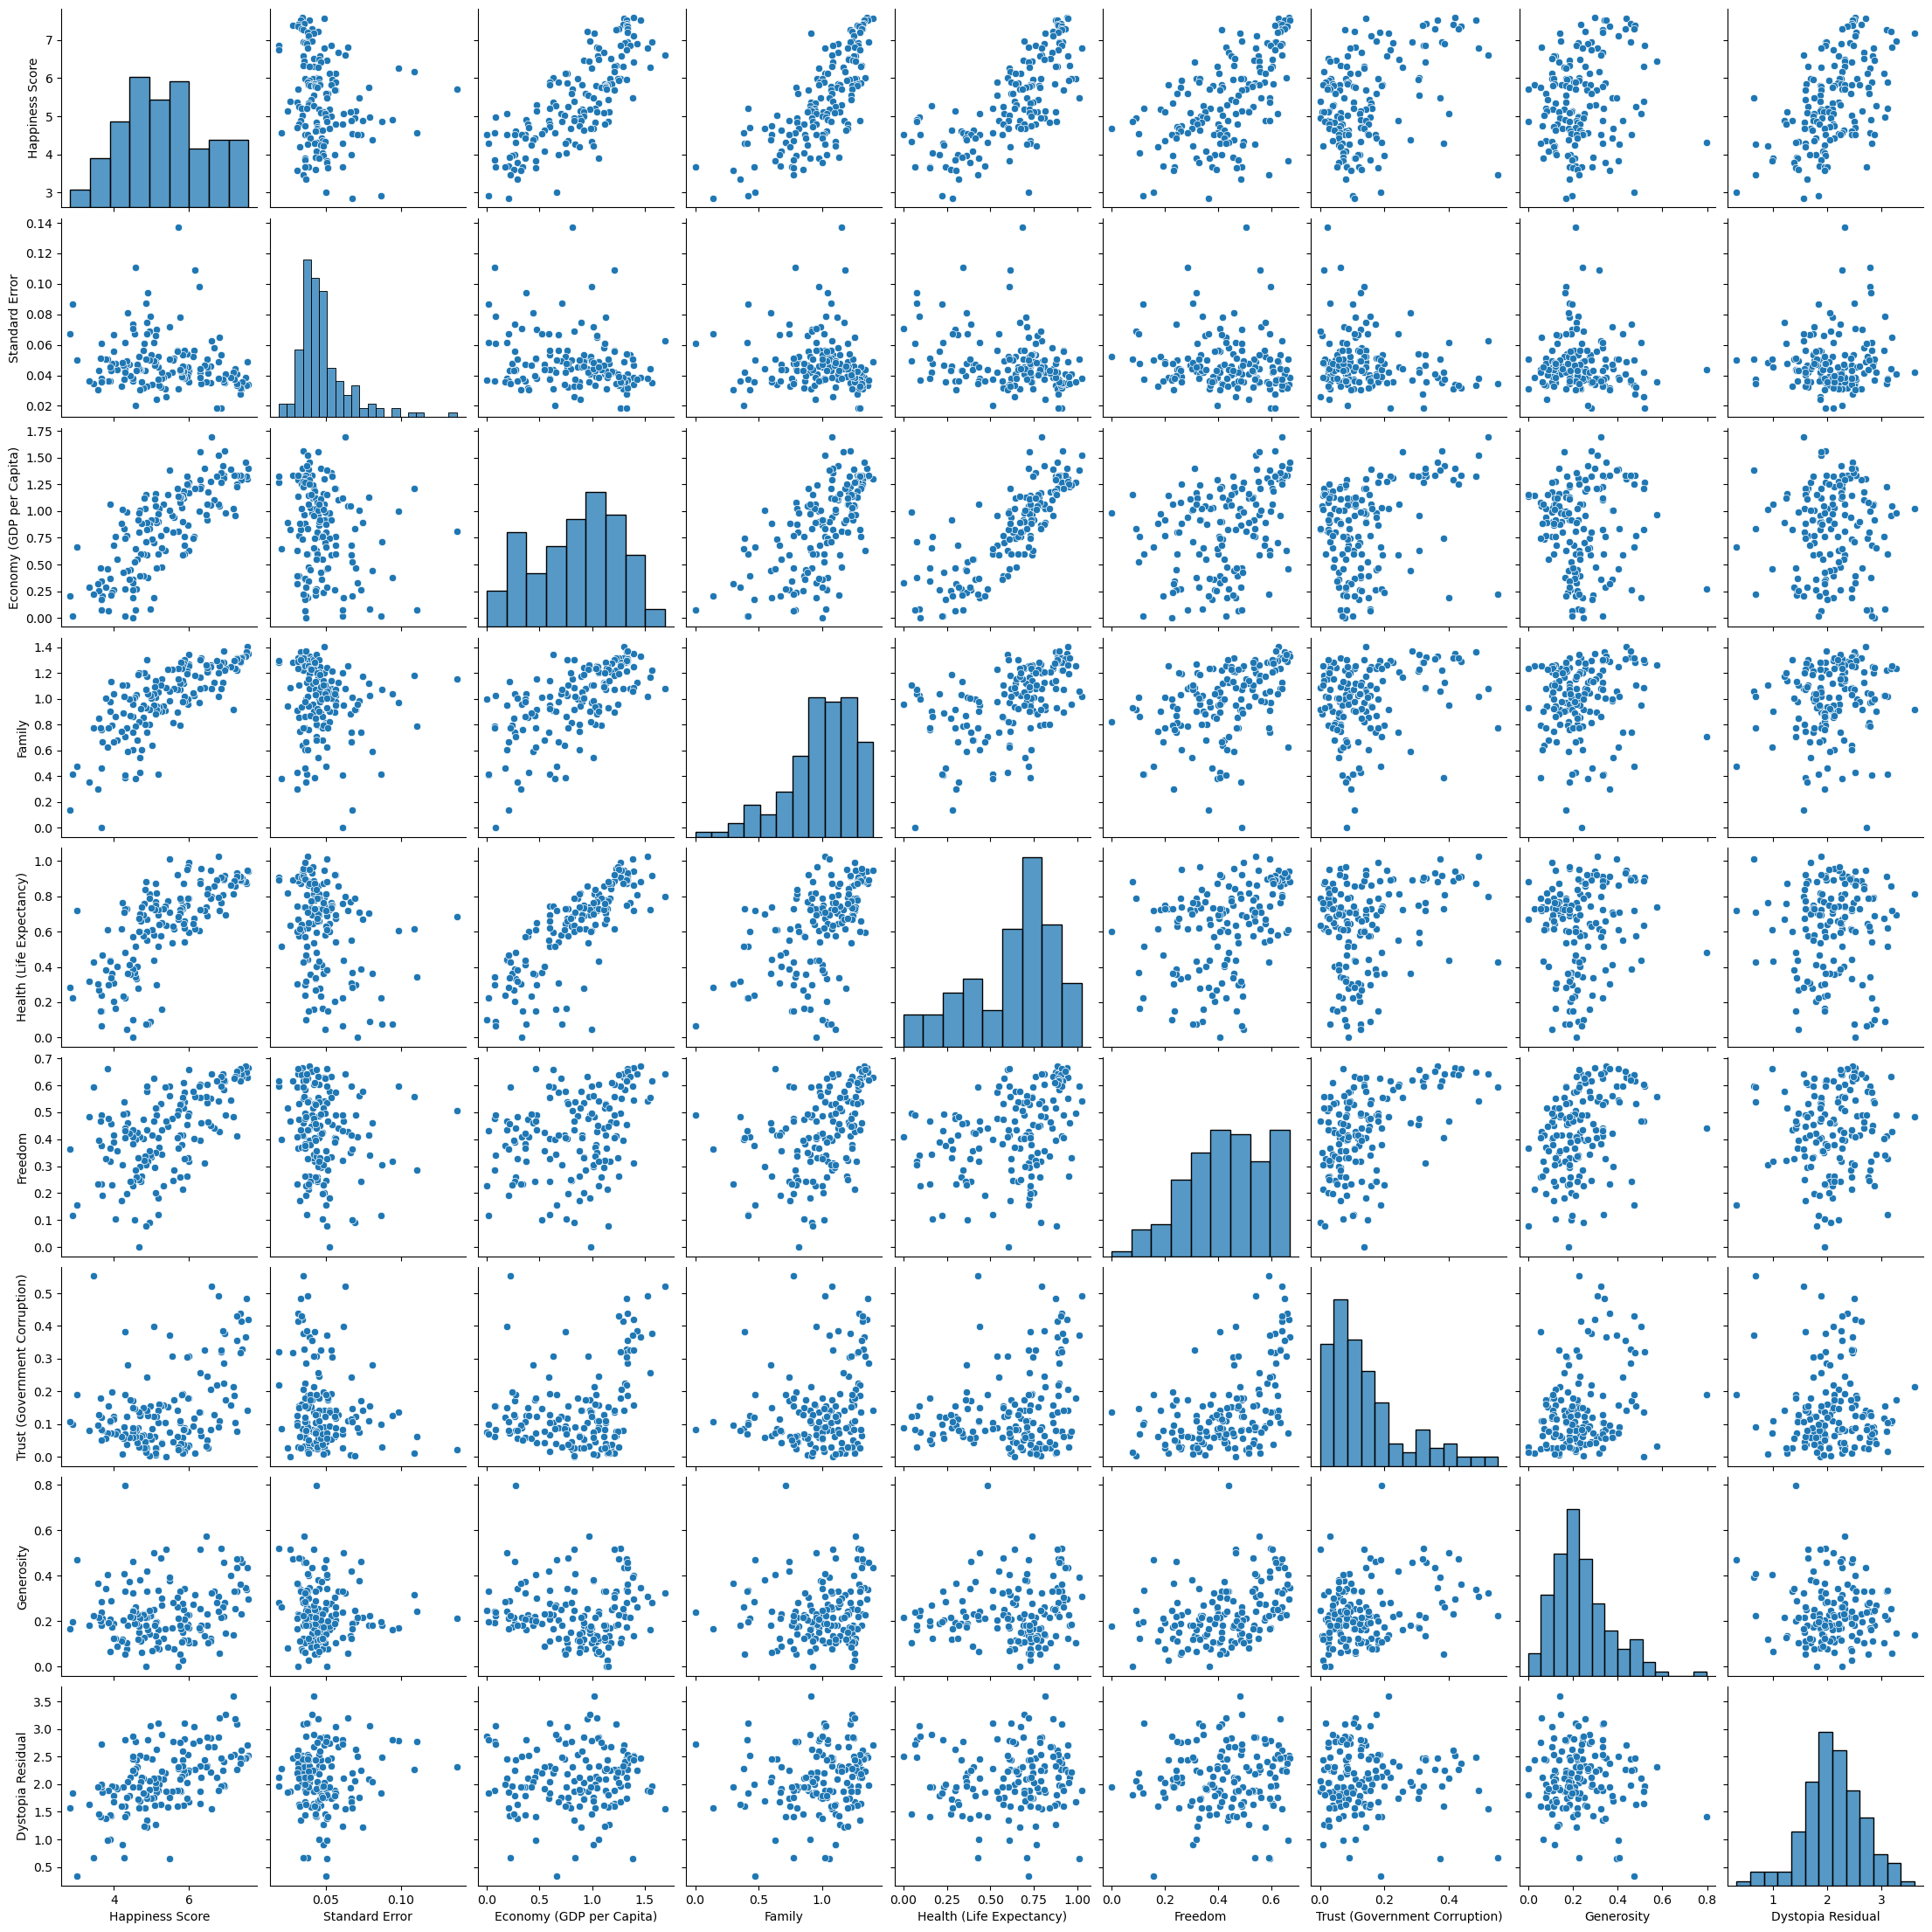

In [12]:
# visulaization with pairplot:
sns.pairplot(df)
plt.show()

By the pairplot we notice that the how the data is distributed

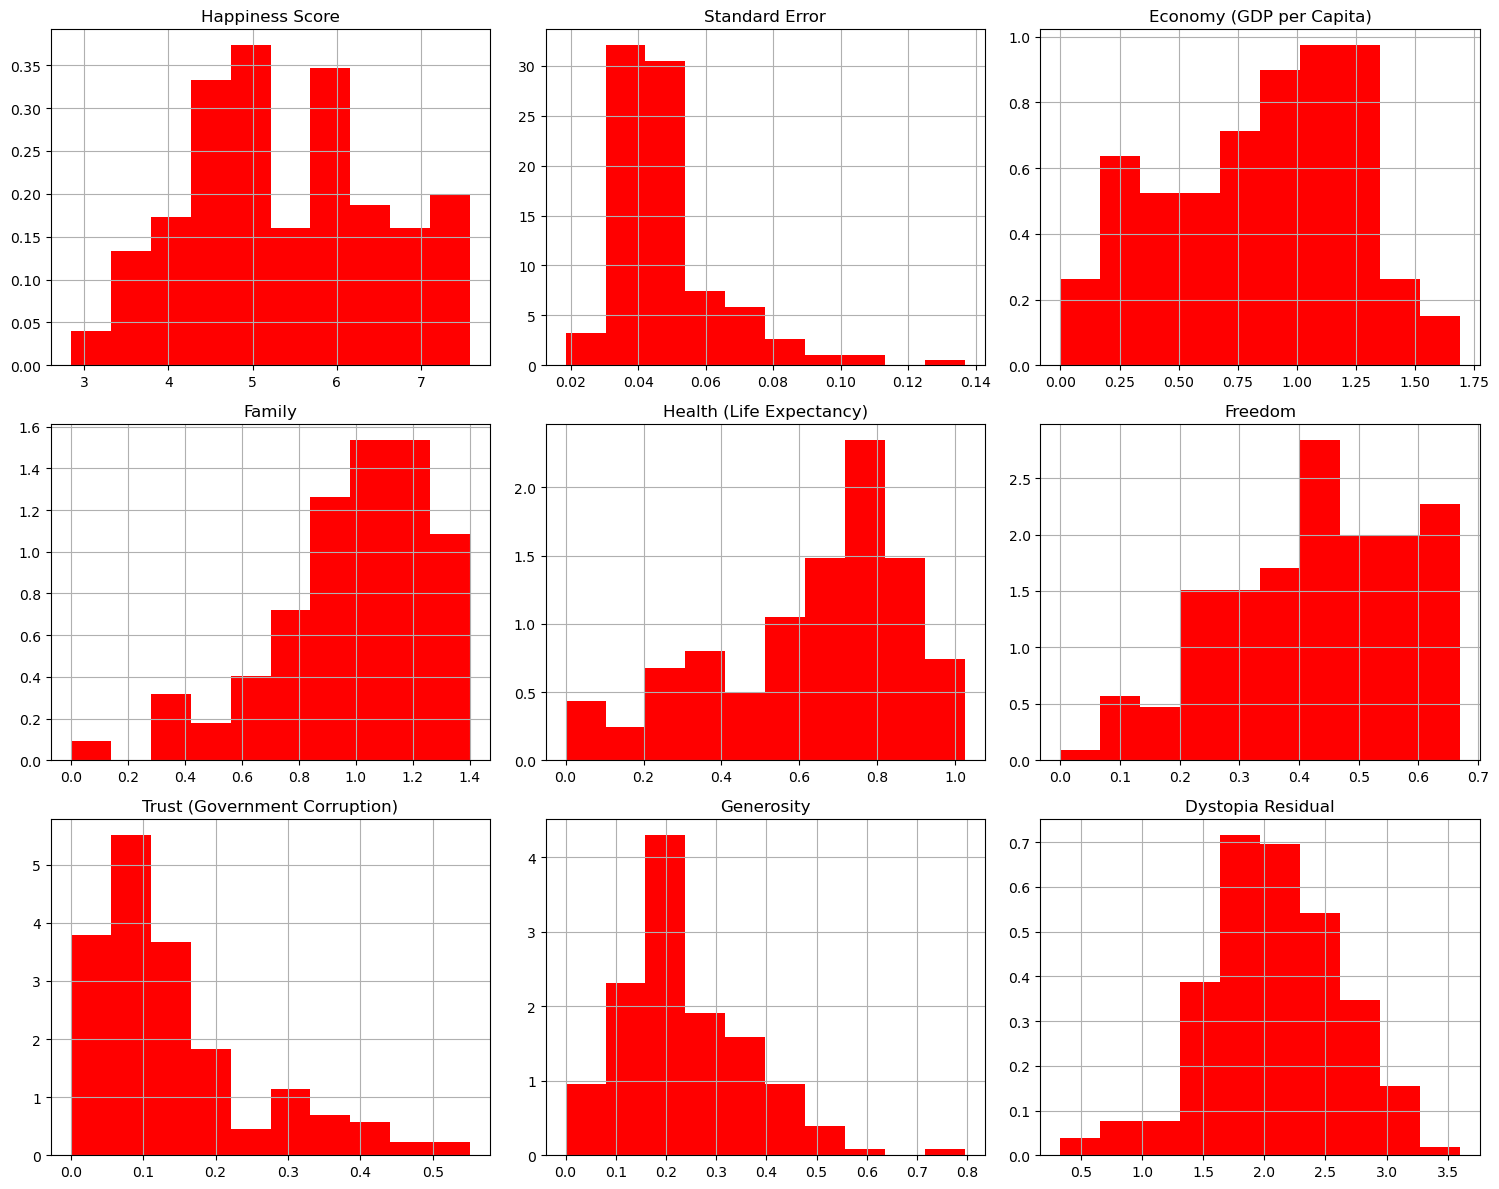

In [13]:
# histogram 
plt.rcParams['figure.figsize']=(15,12)
df.hist(bins=10,color='red',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()


From the histogram visualization we can see that there are colmns with skewness and not normally distributed

Happiness Score                     AxesSubplot(0.125,0.712609;0.0945122x0.167391)
Standard Error                   AxesSubplot(0.238415,0.712609;0.0945122x0.167391)
Economy (GDP per Capita)         AxesSubplot(0.351829,0.712609;0.0945122x0.167391)
Family                           AxesSubplot(0.465244,0.712609;0.0945122x0.167391)
Health (Life Expectancy)         AxesSubplot(0.578659,0.712609;0.0945122x0.167391)
Freedom                          AxesSubplot(0.692073,0.712609;0.0945122x0.167391)
Trust (Government Corruption)    AxesSubplot(0.805488,0.712609;0.0945122x0.167391)
Generosity                          AxesSubplot(0.125,0.511739;0.0945122x0.167391)
Dystopia Residual                AxesSubplot(0.238415,0.511739;0.0945122x0.167391)
dtype: object

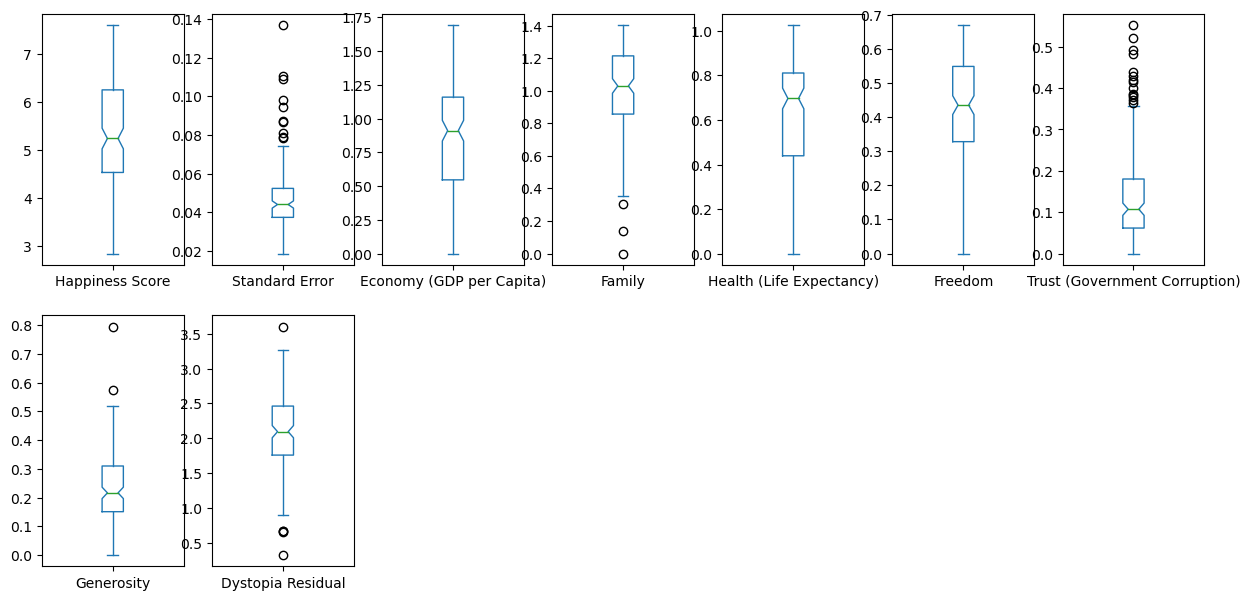

In [14]:
# Box plot
df.plot(kind='box',subplots=True,layout=(4,7),figsize=(15,15),notch=True)

we can notice in the columns STandard Error,Trust,Family,Generosity,Dystopia Residual skewness is present.

# Skewness find by skew()

In [15]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

from this we can notice that in some columns skewness is not in acceptable range that is -0.5 to 0.5. This shows that there are outlier present in the dataset need to be treated

# Removing Outliers

In [16]:
# z score methed application
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


with  Z score method we are able to detect the outliers . we have removed the outliers fromthe data set.

In [17]:
# checking how much data is lost 
data = (158-149)/158*100
data

5.69620253164557

we can see the 5% of data is lost that is minimal no a big loss . this can be  accepted.

# Spliting Data

In [18]:
x=df.drop('Happiness Score',axis =1) 
y=df['Happiness Score']

we splitted the dataset into feature and lebel for training and testing the model

In [19]:
x.shape

(149, 8)

In [20]:
y.shape

(149,)

In [21]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [22]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# Scaling 

In [23]:
scale1=PowerTransformer(method='yeo-johnson')
x_scaled=pd.DataFrame(scale1.fit_transform(x),columns=x.columns)

In [24]:
x_scaled

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


we can see the data after applying the Power Transformer Scaler

In [38]:
# Training and Testing data sets
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75,random_state=42,shuffle=True)

we are training 75% of data and remaining 25% data using for testing 

# ML Learning Model for Regression

In [39]:
#Model selection
linear_model=LinearRegression()
svr_model=SVR(C=1.0,epsilon=0.2,kernel='poly',gamma='auto')
dtr_model=DecisionTreeRegressor(criterion='poisson',random_state=111)
rfr_model=RandomForestRegressor(max_depth=2,max_features='sqrt')
knr_model = KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')


# Model Training

In [40]:
linear_model.fit(x_train,y_train)
svr_model.fit(x_train,y_train)
dtr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
knr_model.fit(x_train,y_train)


KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [41]:
#prediction
pred_linear=linear_model.predict(x_test)
pred_svr=svr_model.predict(x_test)
pred_dtr=dtr_model.predict(x_test)
pred_rfr=rfr_model.predict(x_test)
pred_knr=knr_model.predict(x_test)

once we have trained the model we are predicting the label by providingthe unseen test features and storing the val in a predicting variable

# Evalution  metrics

In [43]:
se_linear=mean_squared_error(y_test,pred_linear)
se_svr=mean_squared_error(y_test,pred_svr)
se_dtr=mean_squared_error(y_test,pred_dtr)
se_rfr=mean_squared_error(y_test,pred_rfr)
se_knr=mean_squared_error(y_test,pred_knr)

rmse_linear=sqrt(se_linear)
rmse_svr=sqrt(se_svr)
rmse_dtr=sqrt(se_dtr)
rmse_rfr=sqrt(se_rfr)
rmse_knr=sqrt(se_knr)




In [44]:
print('linear Regression: ' ,rmse_linear)
print('Support Vector Regression:',rmse_svr)
print("Decision Tree Regressor:",rmse_dtr)
print('Random Forest Regressor:',rmse_rfr)
print('K Neighbors Regressor :',rmse_knr)

linear Regression:  0.06638458610380142
Support Vector Regression: 0.43020959342150195
Decision Tree Regressor: 0.6827919656974976
Random Forest Regressor: 0.6248035561374404
K Neighbors Regressor : 0.34579756208997253


we have predicted and can see the differnce betwwen predicted and actual label.

In [45]:
#R2 Score for the model:

print("R2 Score for Linear Regression is:",r2_score(y_test,pred_linear,multioutput='variance_weighted')*100)
print("R2 Score for Support Vector Regression is:",r2_score(y_test,pred_svr,multioutput='variance_weighted')*100)
print("R2 Score for Decision Tree Regressor  is:",r2_score(y_test,pred_dtr,multioutput='variance_weighted')*100)
print("R2 Score for Random Forest Regressor  is:",r2_score(y_test,pred_rfr,multioutput='variance_weighted')*100)
print("R2 Score for K Neighbors Regressor  is:",r2_score(y_test,pred_knr,multioutput='variance_weighted')*100)

R2 Score for Linear Regression is: 99.61289492395045
R2 Score for Support Vector Regression is: 83.74247075798078
R2 Score for Decision Tree Regressor  is: 59.04837243238613
R2 Score for Random Forest Regressor  is: 65.70890543635402
R2 Score for K Neighbors Regressor  is: 89.49639897867345


We use R2 score to evaluate the model and check the accuracy by which we would be able to chosse our best regression model.

By comparing the RMSE and R2 score among all the 5 Regression algorithm we can see that Linear Regresson Model has higgest R2 score and Lowest RMSE which indicates that Linear Regression model is the best among all.

In [46]:
#Hyper Parameter Tuning on the best ML Model:
Lr_Param={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}
    

In [47]:
from sklearn.model_selection import GridSearchCV


In [48]:
GSCV=GridSearchCV(LinearRegression(),Lr_Param,cv=5)


In [49]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False]})

In [51]:
GSCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [52]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1, normalize=True)
CLassifer=Final_model.fit(x_train,y_train)
lr_pred=Final_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)


R2 score for the Final Model is: 99.61289492395045


# Saving the Model(using pickle or joblib):

In [55]:
filename ='FinalModel_Happiness.pkl'
pickle.dump(Final_model,open(filename,'wb'))


In [56]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)*100
print(result)

99.61289492395045


Finally I have loaded the saved model and passed the unseen data set to predict the model score.

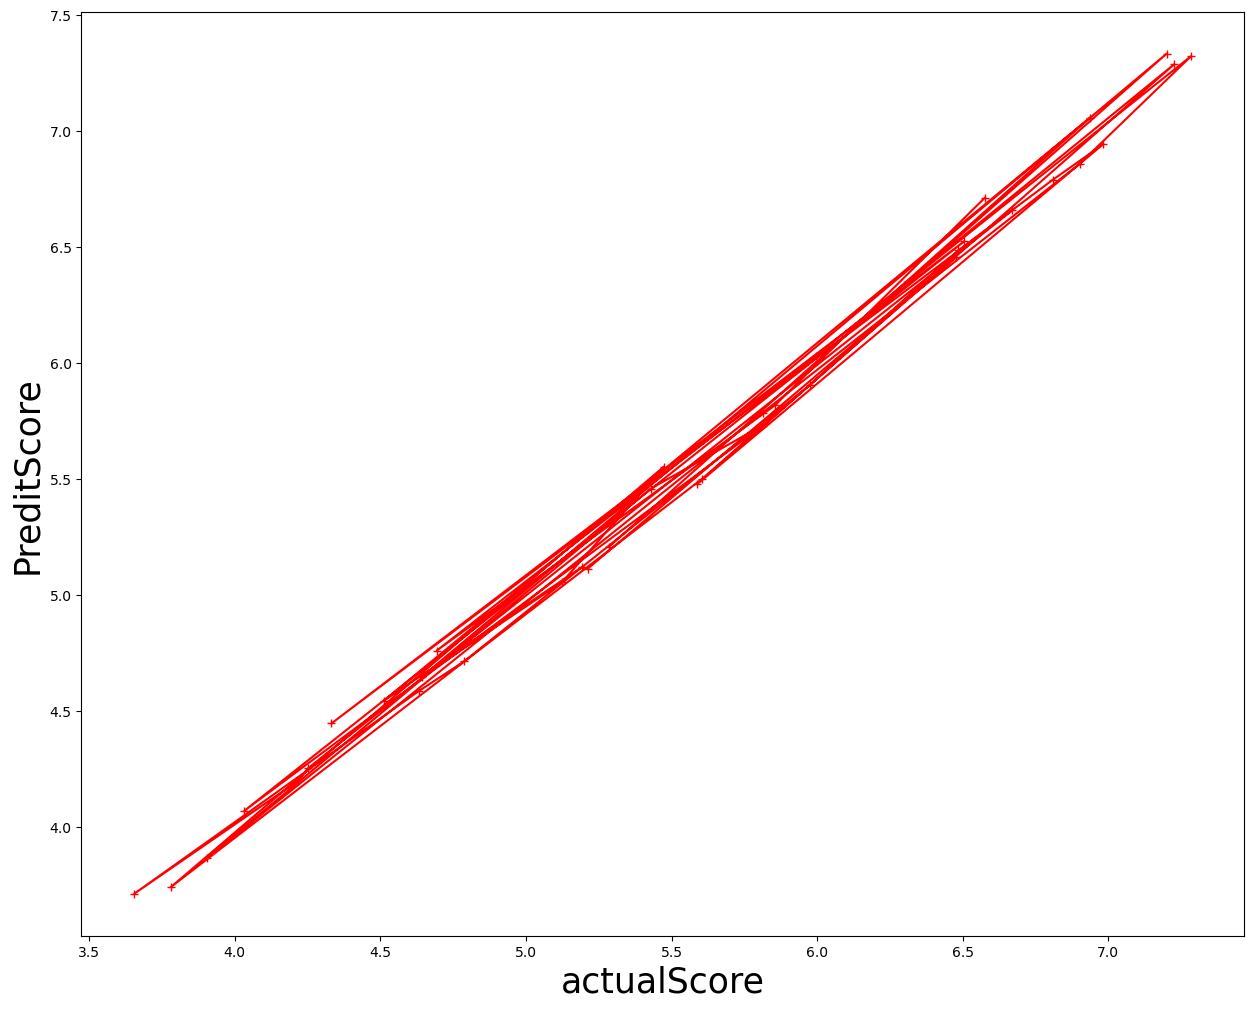

In [57]:
plt.xlabel('actualScore',fontsize=25)
plt.ylabel('PreditScore',fontsize=25)
plt.plot(y_test,lr_pred,color='red',marker='+')
plt.show()
